<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

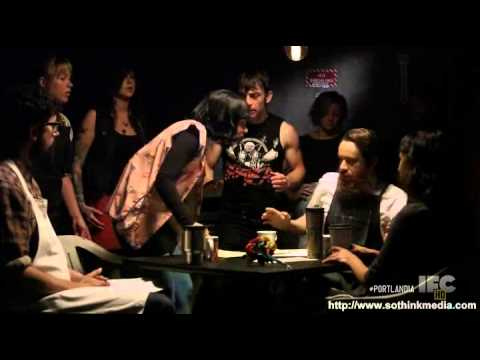

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [180]:
%pwd

'/content'

In [187]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

shops['star_rating'] = shops['star_rating'].replace({' 1.0 star rating ':1, 
                                                     ' 2.0 star rating ':2, 
                                                     ' 3.0 star rating ':3, 
                                                     ' 4.0 star rating ':4, 
                                                     ' 5.0 star rating ':5})

shops['date'] = shops['full_review_text'].apply(lambda x: x.split(" ")[1])

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.split(" ", 2)[2])

shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016


In [188]:
import spacy
from spacy.tokenizer import Tokenizer
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [193]:
lemmas = []
 
""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.pos_ != 'PRON') & (token.is_space == False) & (token.is_digit == False):
            doc_tokens.append(str(token.lemma_).lower())
 
    lemmas.append(doc_tokens)
 
shops['lemmas'] = lemmas

shops.head()

,coffee_shop_name,full_review_text,star_rating,date,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[check-in, love, love, love, atmosphere!, corn..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[check-in, listed, brunch, spots, love, eclect..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[cool, decor!, good, drink, nice, seat, howeve..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[check-in, locate, northcross, mall, shop, cen..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [195]:
def count(docs):
    # Takes a column of tokens and returns a table with information about each word
    # word: The token itself
    # appears_in: Number of rows in which the word appears
    # count: Total number of times the word appears
    # rank: Rank of how often the word is used in reviewes
    # pct_total: Percentage of all words used
    # cul_pct_total: Cumulative percentage total
    # appears_in_pct: Percentage of all rows in which it appears
 
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
 
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
 
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
 
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
 
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
 
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
 
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [194]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

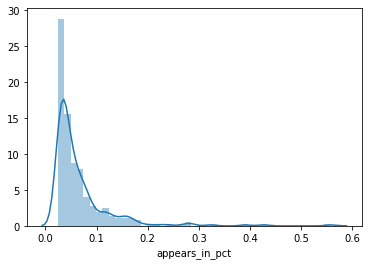

In [199]:
wc_all = count(shops['lemmas'])

wc_all = wc_all[wc_all['appears_in_pct'] >= 0.025]

sns.distplot(wc_all['appears_in_pct']);

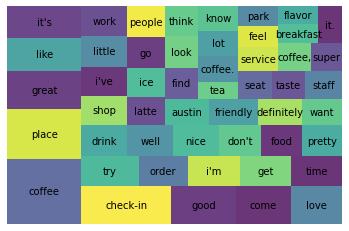

In [216]:
wc_all_top50 = wc_all[wc_all['rank'] <= 50]

squarify.plot(sizes=wc_all_top50['appears_in_pct'], label=wc_all_top50['word'], alpha=.8 )
plt.axis('off')
plt.show()

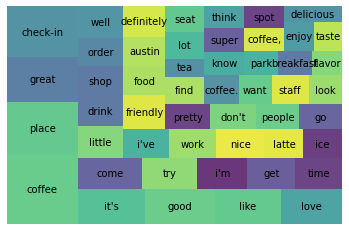

In [215]:
wc_good = count(shops[shops['star_rating'].isin([4, 5])]['lemmas'])

wc_good = wc_good[wc_good['appears_in_pct'] >= 0.025]

wc_good_top50 = wc_good[wc_good['rank'] <= 50]

squarify.plot(sizes=wc_good_top50['appears_in_pct'], label=wc_good_top50['word'], alpha=.8 )
plt.axis('off')
plt.show()

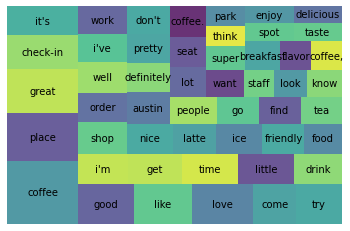

In [214]:
wc_bad = count(shops[shops['star_rating'].isin([1, 2, 3])]['lemmas'])

wc_bad = wc_bad[wc_bad['appears_in_pct'] >= 0.025]

wc_bad_top50 = wc_bad[wc_bad['rank'] <= 50]

squarify.plot(sizes=wc_bad_top50['appears_in_pct'], label=wc_good_top50['word'], alpha=.8 )
plt.axis('off')
plt.show()

I don't see much of any difference in the sorts of words which appear in "good" versus "bad" coffee shops.

Note: I am using the "appears_in_pct" instead of "count" or "appears_in" because the number of reviews of good and bad coffee shops is not equal, so using the latter two would bias in favor of the type with more reviews.

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [240]:
wc_diff = wc_good.merge(wc_bad, on='word')
wc_diff = wc_diff[['word', 'appears_in_pct_x', 'appears_in_pct_y']]
wc_diff['appears_in_pct_diff'] = wc_diff['appears_in_pct_x'] - wc_diff['appears_in_pct_y']

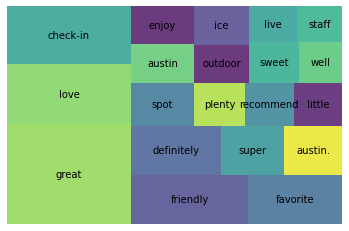

In [242]:
wc_diff_topgood = wc_diff.sort_values(by='appears_in_pct_diff', ascending=False)

squarify.plot(sizes=wc_diff_topgood.head(20)['appears_in_pct_diff'], label=wc_diff_topgood.head(20)['word'], alpha=.8 )
plt.axis('off')
plt.show()

Good coffee shops are those that permit customers to chec-in, have friendly staff, have enough ice, have outdoor seeting, have plenty of room, and are in a convenient spot in the city.

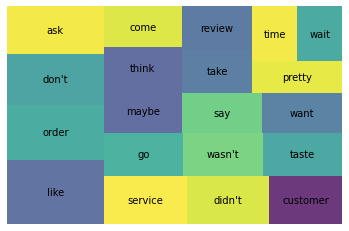

In [244]:
wc_diff_topbad = wc_diff.sort_values(by='appears_in_pct_diff', ascending=True)

squarify.plot(sizes=wc_diff_topbad.head(20)['appears_in_pct_diff'], label=wc_diff_topbad.head(20)['word'], alpha=.8 )
plt.axis('off')
plt.show()

Bad coffee shops have bad service, problems with their orders, have drink and food with a bad taste, and long wait times.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

